In [1]:
import pandas as pd
from matplotlib import rc
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

Text(0.2, 0.4, '한글')

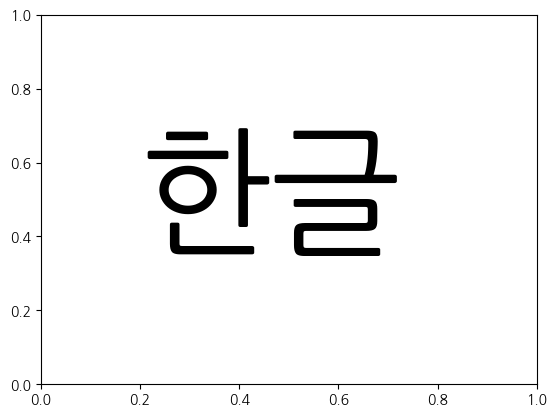

In [2]:
#윈도우용 폰트 경로 설정 
path = "C:\\Windows\\Fonts\\NanumGothic.ttf"
font_name =fm.FontProperties(fname=path).get_name()
rc('font',family=font_name)
plt.text(0.2,0.4,'한글',size=100)

In [3]:
#csv 파일 임포트 
file_path ="./ref/출입국항구내외국인성별국제이동연간_202503051.csv"
ori = pd.read_csv(file_path,encoding="EUC-KR")
ori.head()

,출입국항별,내외국인별,성별,시점,항목,데이터
0,인천공항,내국인,남자,2001,입국자,70444
1,인천공항,내국인,남자,2001,출국자,96551
2,인천공항,내국인,남자,2002,입국자,101032
3,인천공항,내국인,남자,2002,출국자,124319
4,인천공항,내국인,남자,2003,입국자,102093


In [4]:
ex8_data = ori.copy()
ex8_data.columns = ['airport','type1','gender','year','type2','value']
ex8_data.head()

,airport,type1,gender,year,type2,value
0,인천공항,내국인,남자,2001,입국자,70444
1,인천공항,내국인,남자,2001,출국자,96551
2,인천공항,내국인,남자,2002,입국자,101032
3,인천공항,내국인,남자,2002,출국자,124319
4,인천공항,내국인,남자,2003,입국자,102093


In [5]:
#필터제작 
filter8 = ex8_data['type1']=='외국인'
ex8_data = ex8_data[filter8].copy()
ex8_data


,airport,type1,gender,year,type2,value
92,인천공항,외국인,남자,2001,입국자,60699
93,인천공항,외국인,남자,2001,출국자,44548
94,인천공항,외국인,남자,2002,입국자,77745
95,인천공항,외국인,남자,2002,출국자,58784
96,인천공항,외국인,남자,2003,입국자,85643
...,...,...,...,...,...,...
179,인천공항,외국인,여자,2021,출국자,112458
180,인천공항,외국인,여자,2022,입국자,172332
181,인천공항,외국인,여자,2022,출국자,106797
182,인천공항,외국인,여자,2023,입국자,181388


In [7]:
filter9 = ex8_data['gender'] =='남자'
ex9_data = ex8_data[filter9].copy() # 외국인 남자 
ex9_data.head()

,airport,type1,gender,year,type2,value
92,인천공항,외국인,남자,2001,입국자,60699
93,인천공항,외국인,남자,2001,출국자,44548
94,인천공항,외국인,남자,2002,입국자,77745
95,인천공항,외국인,남자,2002,출국자,58784
96,인천공항,외국인,남자,2003,입국자,85643


In [8]:
filter10 = ex8_data['gender'] =='여자'
ex10_data = ex8_data[filter10].copy() #외국인 여자
ex10_data.head()

,airport,type1,gender,year,type2,value
138,인천공항,외국인,여자,2001,입국자,47963
139,인천공항,외국인,여자,2001,출국자,28348
140,인천공항,외국인,여자,2002,입국자,57354
141,인천공항,외국인,여자,2002,출국자,38709
142,인천공항,외국인,여자,2003,입국자,54732


In [27]:
ex9_data = ex9_data.groupby('year')['value'].sum().reset_index(name='total')
ex9_data.head()

,year,total
0,2001,105247
1,2002,136529
2,2003,167321
3,2004,162844
4,2005,271870


In [28]:
ex10_data = ex10_data.groupby('year')['value'].sum().reset_index(name='total')
ex10_data.head()

,year,total
0,2001,76311
1,2002,96063
2,2003,107142
3,2004,110680
4,2005,171856


<Axes: title={'center': '2021년~2023년 인천공항 출입 외국인남성 차트'}>

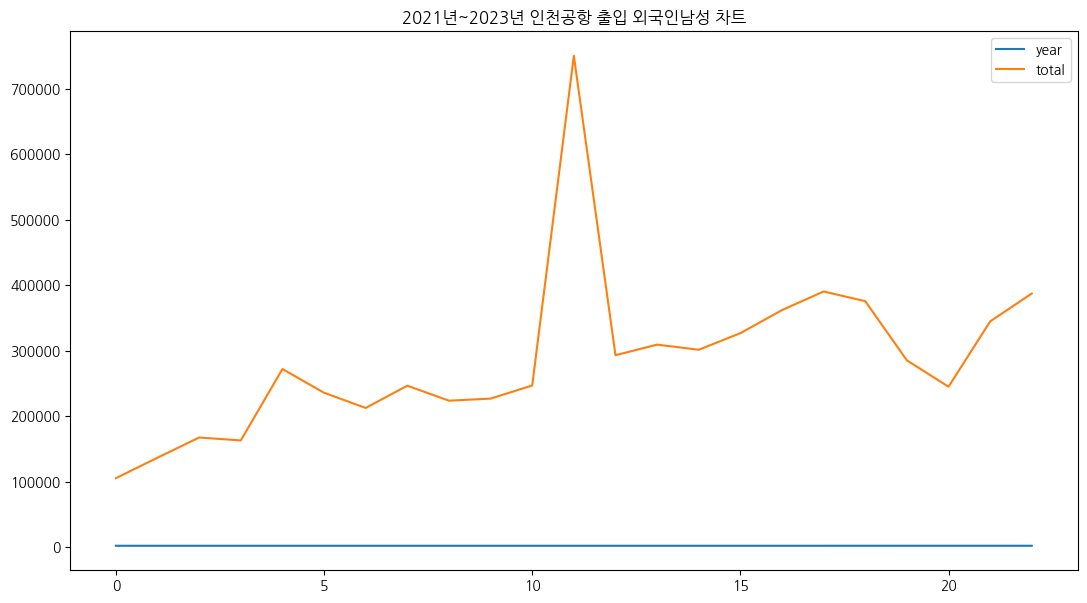

In [29]:
ex9_data.plot(figsize=(13,7),title="2021년~2023년 인천공항 출입 외국인남성 차트")

<Axes: title={'center': '2021~2023년 인천공항 출입 외국인 여성 '}>

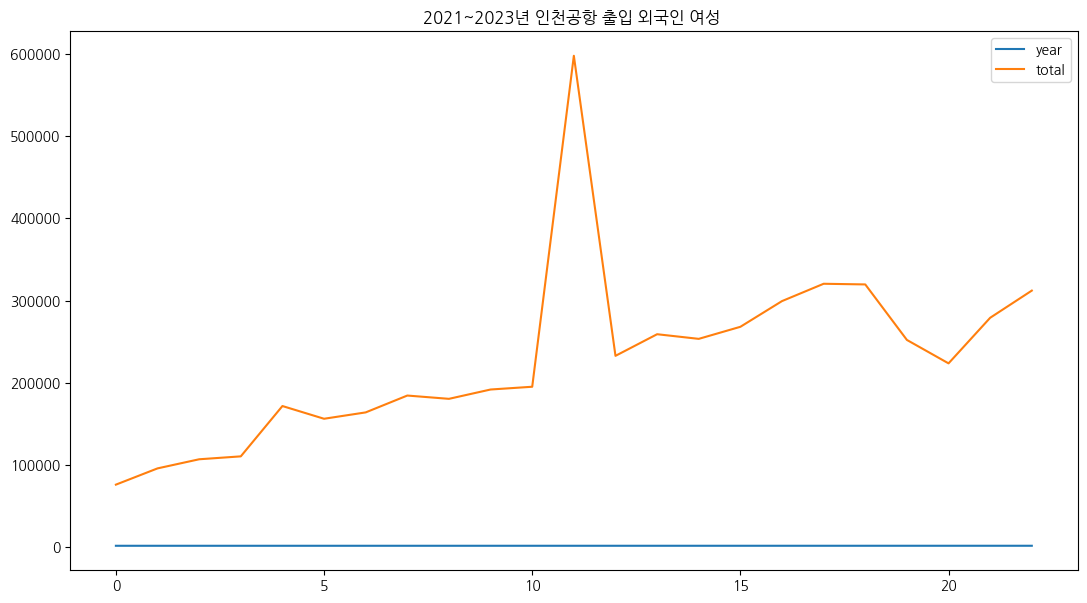

In [30]:
ex10_data.plot(figsize=(13,7),title="2021~2023년 인천공항 출입 외국인 여성 ")

In [24]:
from prophet import Prophet

In [31]:
#페이스북에서는 time(year)을 ds,value는 y를 사용하므로 전처리해줌 
ex11_data = ex9_data.copy()
ex11_data['year'] = pd.to_datetime(ex11_data['year'],format="%Y")
ex11_data = ex11_data.rename(columns={'year':'ds','total':'y'})
ex11_data.tail()

,ds,y
18,2019-01-01,375504
19,2020-01-01,285079
20,2021-01-01,244892
21,2022-01-01,344636
22,2023-01-01,387200


In [32]:
m = Prophet()
m.fit(ex11_data)

15:27:44 - cmdstanpy - INFO - Chain [1] start processing
15:27:44 - cmdstanpy - INFO - Chain [1] done processing


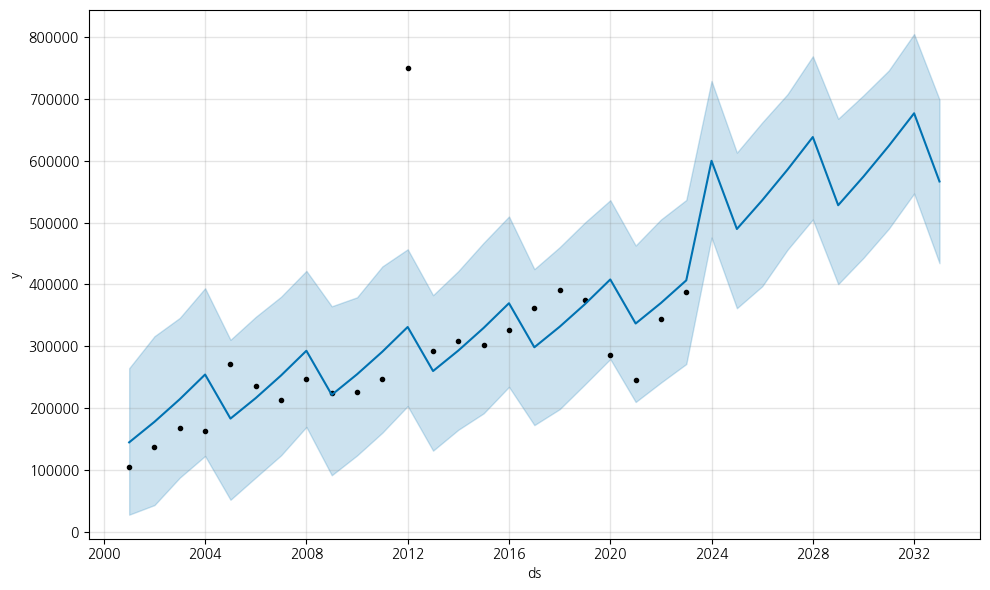

<Figure size 1000x1500 with 0 Axes>

In [33]:
future = m.make_future_dataframe(periods=10,freq='YE') #10년 후까지의 데이터 예측 
forecast = m.predict(future)
fig1 = m.plot(forecast)
plt.savefig("./chart/인천공항외국인남녀출입예측.png")
plt.figure(figsize=(10,15))
plt.show()

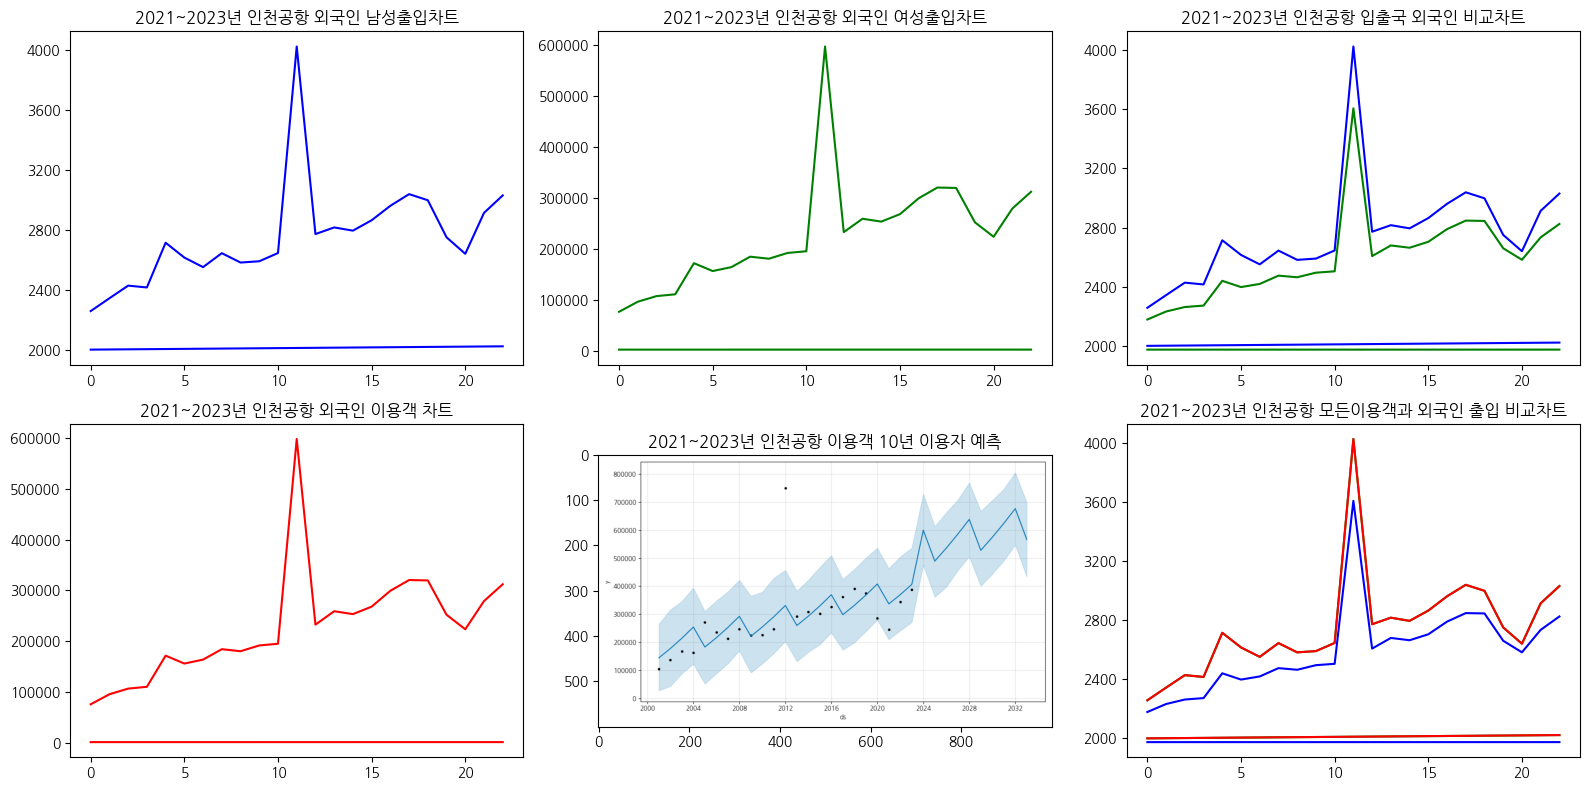

In [34]:
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
#이미지 불러오기 
img = mpimg.imread("./chart/인천공항외국인남녀출입예측.png")
fig, axs = plt.subplots(2,3,figsize=(16,8)) #2x2 서브플롯 생성 

axs[0,0].plot(ex11_data,color="b")
axs[0,1].plot(ex10_data,color="g")
axs[0,2].plot(ex11_data,color="b")
axs[0,2].plot(ex10_data,color="g")
axs[1,0].plot(ex10_data,color="r")
axs[1,2].plot(ex10_data,color="b")
axs[1,2].plot(ex11_data,color="g")
axs[1,2].plot(ex11_data,color="r")
axs[0,0].set_title("2021~2023년 인천공항 외국인 남성출입차트")
axs[0,1].set_title("2021~2023년 인천공항 외국인 여성출입차트")
axs[0,2].set_title("2021~2023년 인천공항 입출국 외국인 비교차트")
axs[1,0].set_title("2021~2023년 인천공항 외국인 이용객 차트")
axs[1,1].set_title("2021~2023년 인천공항 이용객 10년 이용자 예측")
axs[1,2].set_title("2021~2023년 인천공항 모든이용객과 외국인 출입 비교차트")

axins = fig.add_axes(axs[1,1])
axins.imshow(img)
plt.tight_layout()
plt.show()
